In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**DATASET**

In [4]:
df = pd.read_csv('labeled_data.csv')
df.head()

,S.NO,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


**Supervised Learning**

0 - hate speech
1 - offensive language
2 - neither

hate_speech = number of users who judged the tweet to be hate speech.

offensive_language = number of users who judged the tweet to be offensive.

neither = number of users who judged the tweet to be neither offensive nor non-offensive.

class = class label for majority of users. 

In [5]:
classes = ['Hate Speech','Offensive Language','None']

In [6]:
df.drop(['S.NO','count','hate_speech','offensive_language','neither'],axis=1,inplace=True)

In [7]:
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [10]:
hate_tweets = df[df['class']==0]
offensive_tweets = df[df['class']==1]
neither = df[df['class']==2]
print(hate_tweets.shape)
print(offensive_tweets.shape)
print(neither.shape)

(1430, 2)
(19190, 2)
(4163, 2)


In [8]:
df.shape

(24783, 2)

Hate Speech  :  1430
Offensive Language  :  19190
None  :  4163


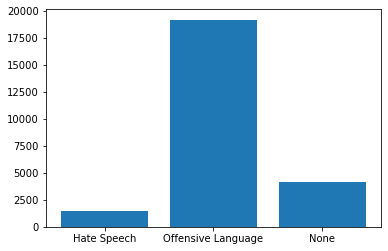

In [9]:
labels = df['class']
unique, counts = np.unique(labels, return_counts=True)
values = list(zip(unique, counts))
plt.bar(classes,counts)
for i in values:
    print(classes[i[0]],' : ',i[1])
plt.show()

**Extracting Tweets of All Classes**

In [11]:
for i in range(3):
    hate_tweets = pd.concat([hate_tweets,hate_tweets],ignore_index = True)
neither = pd.concat([neither,neither,neither], ignore_index = True)
offensive_tweets = offensive_tweets.iloc[0:12000,:]
print(hate_tweets.shape)
print(offensive_tweets.shape)
print(neither.shape)

(11440, 2)
(12000, 2)
(12489, 2)


**Balancing the Dataset**

Taking around 12000 tweets for all the classes

Repeating Hate tweets 8 times

Repeating Neither tweets 2 times

In [12]:
df = pd.concat([hate_tweets,offensive_tweets,neither],ignore_index = True)
df.shape

(35929, 2)

Hate Speech  :  11440
Offensive Language  :  12000
None  :  12489


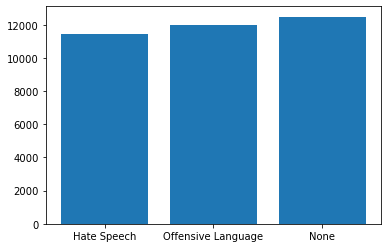

In [13]:
labels = df['class']
unique, counts = np.unique(labels, return_counts=True)
values = list(zip(unique, counts))
plt.bar(classes,counts)
for i in values:
    print(classes[i[0]],' : ',i[1])
plt.show()

In [14]:
df.head()

,class,tweet
0,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
1,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
2,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
3,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
4,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."


**Tweets Preprocessing**

In [15]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Meenakshi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Meenakshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
d = {'luv':'love','wud':'would','lyk':'like','wateva':'whatever','ttyl':'talk to you later',
               'kul':'cool','fyn':'fine','omg':'oh my god!','fam':'family','bruh':'brother',
               'cud':'could','fud':'food', 'u': 'you', 
     'ur':'your', 'bday' : 'birthday', 'bihday' : 'birthday'}

In [17]:
stop_words = set(stopwords.words("english"))
stop_words.add('rt')
stop_words.remove('not')
lemmatizer = WordNetLemmatizer()
giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|' '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
mention_regex = '@[\w\-]+'

def clean_text(text):
    text = re.sub('"', "", text)
    text = re.sub(mention_regex, ' ',text) #removing all user names
    text = re.sub(giant_url_regex, ' ', text)  #remocing the urls
    text = text.lower()
    text = re.sub("hm+", "", text) #removing variants of hmmm
    text = re.sub("[^a-z]+", " ", text) #removing all numbers, special chars like @,#,? etc
    text = text.split()
    text = [word for word in text if not word in stop_words]
    text = [d[word] if word in d else word for word in text]  #replacing some slangs
    text = [lemmatizer.lemmatize(token) for token in text]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = " ".join(text)
    return text

In [18]:
df['processed_tweets'] = df.tweet.apply(lambda x: clean_text(x))   # df.review.map(clean_text) Also can be used
df.head()

,class,tweet,processed_tweets
0,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1...",queer gaywad
1,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ...",alsarabsss he beaner smh tell he mexican
2,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b...",fuck gay blacklist hoe hold tehgodclan anyway
3,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL...",lmfaoooo hate black people black people nigger
4,0,"""@NoChillPaz: ""At least I'm not a nigger"" http...",least not nigger lmfao


In [19]:
x = df.processed_tweets
y = df['class']
print(x.shape)
print(y.shape)

(35929,)
(35929,)


**Word Frequency and Tweets Length**

In [20]:
# finding unique words
word_unique = []
for i in x:
    for j in i.split():
        word_unique.append(j)
unique, counts = np.unique(word_unique, return_counts=True)
print("The total words in the tweets are : ", len(word_unique))
print("The total UNIQUE words in the tweets are : ", len(unique))

The total words in the tweets are :  275540
The total UNIQUE words in the tweets are :  14146


In [21]:
# finding length of tweets
tweets_length = []
for i in x:
    tweets_length.append(len(i.split()))
print("The Average Length tweets are : ",np.mean(tweets_length))
print("The max length of tweets is : ", np.max(tweets_length))
print("The min length of tweets is : ", np.min(tweets_length))

The Average Length tweets are :  7.669013888502324
The max length of tweets is :  28
The min length of tweets is :  0


In [22]:
tweets_length = pd.DataFrame(tweets_length)
tweets_length.describe()


,0
count,35929.000000
mean,7.669014
std,3.989625
min,0.000000
25%,4.000000
50%,7.000000
75%,11.000000
max,28.000000


In [23]:
#Sorting the Unique words based on their Frequency
col = list(zip(unique, counts))
col = sorted(col, key = lambda x: x[1],reverse=True)
col=pd.DataFrame(col)
print("Top 20 Occuring Words with their frequency are:")
col.iloc[:20,:]

Top 20 Occuring Words with their frequency are:


,0,1
0,bitch,9066
1,like,3817
2,get,3636
3,hoe,3426
4,trash,3217
5,fuck,3103
6,nigga,2819
7,faggot,2239
8,as,2073
9,you,1851


In [24]:
col.describe()

,1
count,14146.000000
mean,19.478298
std,128.082239
min,1.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,9066.000000


**TF-IDF Vectorizer**

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
vectorizer = TfidfVectorizer(max_features = 8000 )
# tokenize and build vocab

vectorizer.fit(x)
# summarize

print(len(vectorizer.vocabulary_))
print(vectorizer.idf_.shape)

8000
(8000,)


In [27]:
x_tfidf = vectorizer.transform(x).toarray()
print(x_tfidf.shape)

(35929, 8000)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix, accuracy_score

In [29]:
x_train,x_test,y_train,y_test = tts(x_tfidf,y,test_size = 0.05)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(34132, 8000)
(1797, 8000)
(34132,)
(1797,)


**SVM Model 1**

In [30]:
svm_model = LinearSVC(class_weight='balanced',multi_class='crammer_singer',max_iter = -1).fit(x_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [31]:
svm_model_predict = svm_model.predict(x_test)
svm_report = classification_report(y_test, svm_model_predict )

In [32]:
print(svm_report)

              precision    recall  f1-score   support

           0       0.88      0.96      0.91       556
           1       0.95      0.85      0.90       640
           2       0.96      0.99      0.98       601

    accuracy                           0.93      1797
   macro avg       0.93      0.93      0.93      1797
weighted avg       0.93      0.93      0.93      1797



**SGD Classifier**

In [33]:
 svm_model_3 = SGDClassifier(n_jobs=-1,class_weight='balanced',penalty='l2').fit(x_train, y_train)

In [34]:
svm_model_predict_3 = svm_model_3.predict(x_test)
svm_report_3 = classification_report(y_test, svm_model_predict_3 )

In [35]:
print(svm_report_3)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       556
           1       0.91      0.84      0.87       640
           2       0.93      0.97      0.95       601

    accuracy                           0.90      1797
   macro avg       0.90      0.90      0.90      1797
weighted avg       0.90      0.90      0.90      1797



**Logistic Regression**

In [36]:
logistic_reg_model = LogisticRegression(n_jobs = -1, penalty='l2', multi_class='multinomial',class_weight = 'balanced',verbose=1).fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  8.9min finished


In [37]:
lr_model_predict = logistic_reg_model.predict(x_test)
lr_model_report = classification_report(y_test, lr_model_predict)

In [38]:
print(lr_model_report)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       556
           1       0.94      0.85      0.90       640
           2       0.95      0.98      0.96       601

    accuracy                           0.92      1797
   macro avg       0.92      0.93      0.92      1797
weighted avg       0.92      0.92      0.92      1797



**Padding and Tokenization**

In [39]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [40]:
num_words = 8000
embed_dim = 32
tokenizer = Tokenizer(num_words=num_words,oov_token = "<oov>" )
tokenizer.fit_on_texts(x)
word_index=tokenizer.word_index
sequences = tokenizer.texts_to_sequences(x)
length=[]
for i in sequences:
    length.append(len(i))
print(len(length))
print("Mean is: ",np.mean(length))
print("Max is: ",np.max(length))
print("Min is: ",np.min(length))

35929
Mean is:  7.669013888502324
Max is:  28
Min is:  0


In [41]:
pad_length = 24
sequences = pad_sequences(sequences, maxlen = pad_length, truncating = 'pre', padding = 'post')
sequences.shape

(35929, 24)

In [42]:
x_train,x_test,y_train,y_test = tts(sequences,y,test_size = 0.05)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(34132, 24)
(1797, 24)
(34132,)
(1797,)


**Training Model on Embeddings**

In [43]:
from keras.layers import Dense, Embedding, Dropout , Activation, Flatten, SimpleRNN
from keras.layers import GlobalMaxPool1D
from keras.models import Model, Sequential
import tensorflow as tf

In [50]:
recall = tf.keras.metrics.Recall()
precision = tf.keras.metrics.Precision()

model_5 = Sequential([Embedding(num_words, embed_dim, input_length = pad_length),
                   SimpleRNN(8, return_sequences = True),
                   GlobalMaxPool1D(),
                   Dense(20,activation = 'relu',kernel_initializer='he_uniform'),
                   Dropout(0.25),
                   Dense(3,activation = 'softmax')])
model_5.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 24, 32)            256000    
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 24, 8)             328       
                                                                 
 global_max_pooling1d_5 (Glo  (None, 8)                0         
 balMaxPooling1D)                                                
                                                                 
 dense_10 (Dense)            (None, 20)                180       
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_11 (Dense)            (None, 3)                 63        
                                                      

In [51]:
history = model_5.fit(x = x_train, y = y_train, epochs = 5,validation_split = 0.05)

Epoch 1/5
1014/1014 [==============================] - 14s 12ms/step - loss: 0.4566 - accuracy: 0.8266 - val_loss: 0.2272 - val_accuracy: 0.9227
Epoch 2/5
1014/1014 [==============================] - 11s 11ms/step - loss: 0.1903 - accuracy: 0.9431 - val_loss: 0.1746 - val_accuracy: 0.9397
Epoch 3/5
1014/1014 [==============================] - 11s 11ms/step - loss: 0.1286 - accuracy: 0.9615 - val_loss: 0.1453 - val_accuracy: 0.9537
Epoch 4/5
1014/1014 [==============================] - 11s 11ms/step - loss: 0.0932 - accuracy: 0.9726 - val_loss: 0.1319 - val_accuracy: 0.9590
Epoch 5/5
1014/1014 [==============================] - 11s 11ms/step - loss: 0.0743 - accuracy: 0.9788 - val_loss: 0.1241 - val_accuracy: 0.9596


In [52]:
train_acc = history.history['accuracy']
valid_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

**Graph and Metrics**

In [53]:
import matplotlib
from matplotlib import pyplot as plt

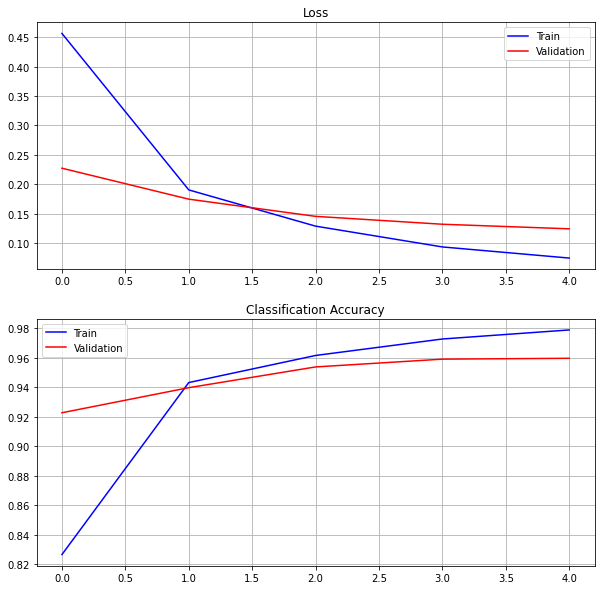

In [54]:
fig=plt.figure(figsize=(10,10))
fig.add_subplot(2, 1, 1)
plt.title('Loss')
plt.grid()
plt.plot(train_loss, color='blue', label='Train')
plt.plot(val_loss, color='red', label='Validation')
plt.legend()
# plot accuracy
fig.add_subplot(2, 1, 2)
plt.title('Classification Accuracy')
plt.grid()
plt.plot(train_acc, color='blue', label='Train')
plt.plot(valid_acc, color='red', label='Validation')
plt.legend()

In [55]:
evaluate = model_5.evaluate(x_test,y_test)

57/57 [==============================] - 0s 5ms/step - loss: 0.1264 - accuracy: 0.9644


In [56]:
print("Test Acuracy is : {:.2f} %".format(evaluate[1]*100))
print("Test Loss is : {:.4f}".format(evaluate[0]))

Test Acuracy is : 96.44 %
Test Loss is : 0.1264


In [58]:
predictions = model_5.predict(x_test)

In [59]:
predict = []
for i in predictions:
    predict.append(np.argmax(i))

In [60]:
cm = confusion_matrix(predict,y_test)
acc = accuracy_score(predict,y_test)
print("The Confusion matrix is: \n",cm)

The Confusion matrix is: 
 [[561  30   0]
 [  5 554   6]
 [  2  21 618]]


In [61]:
print(acc*100)

96.43850862548692


In [62]:
from sklearn import metrics

In [64]:
print(metrics.classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       568
           1       0.98      0.92      0.95       605
           2       0.96      0.99      0.98       624

    accuracy                           0.96      1797
   macro avg       0.96      0.96      0.96      1797
weighted avg       0.96      0.96      0.96      1797

